# Machine Learning


---
## Wine Classification using Support Vector Machine with Performance Evaluation Metrics

By: Nadhif Rif'at Rasendriya



Wine dataset adalah dataset klasik yang sering dipakai untuk **klasifikasi multi-kelas**. Dataset ini berisi **13 fitur numerik** tentang kandungan kimia dalam anggur (wine), seperti **alkohol, keasaman, magnesium, flavonoid, dll.**. Tujuannya adalah untuk mengklasifikasikan anggur menjadi **3 jenis berbeda** berdasarkan karakteristiknya.  

## Import library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Load dan baca dataset

In [ ]:
# Load Wine Dataset
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add target column

Tampilkan 10 data pertama dan terakhir dari dataset

In [ ]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [ ]:
df.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


## Cek missing values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


## Normalisasi fitur
Dilarang menggunakan library

Min Max Scaler

In [ ]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

df_scaled = df.copy()
for col in wine.feature_names:
    df_scaled[col] = min_max_scaling(df[col])

df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


Z Score Scaler

In [ ]:
def z_score_scaling(column):
    return (column - column.mean()) / column.std()

df_standardized = df.copy()
for col in wine.feature_names:
    df_standardized[col] = z_score_scaling(df[col])

df_standardized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0


## Bagi ke menjadi data uji dan data test
Diperbolehkan menggunakan library train_test_split

In [ ]:
X = df_standardized.drop(columns=['target']) # disini saya pakai df hasil standarisasi soalnya akurasi nya jauh lebih tinggi kak dibanding df hasil normalisasi.

y = df['target'] # Target tidak perlu dinormalisasi!
# y = df_standardized['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Data train:", X_train.shape[0])

Data train: 142


In [ ]:
print("Data test:", X_test.shape[0])

Data test: 36


## Fungsi SGD

In [ ]:
def hitung_cost_gradient(X, y, w):
    m = X.shape[0]
    z = np.dot(X, w)
    h = 1 / (1 + np.exp(-z))
    cost = -(1/m) * np.sum(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return cost, gradient

def sgd(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            _, grad = hitung_cost_gradient(xi, yi, w)
            w -= alpha * grad
        cost, _ = hitung_cost_gradient(X, y, w)
        cost_history.append(cost)

    return w, cost_history

## Fungsi training

In [ ]:
def buat_trainingset(X, y, class_label):
    y_binary = np.where(y == class_label, 1, 0)
    return X, y_binary

def training(X_train, y_train):
    classes = np.unique(y_train)
    weights = {}

    X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    for c in classes:
        X_c, y_c = buat_trainingset(X_train_bias, y_train, c)
        w, cost = sgd(X_c, y_c)
        weights[c] = w
        print(f"Training kelas {c} done")

    return weights

## Fungsi testing

In [ ]:
def testing(X_test, y_test, weights):

    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    pred_scores = {}
    for c, w in weights.items():
        z = np.dot(X_test_bias, w)
        h = 1 / (1 + np.exp(-z))
        pred_scores[c] = h

    pred_probs = np.array([pred_scores[c] for c in sorted(weights.keys())]).T
    y_pred = np.argmax(pred_probs, axis=1)

    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    return y_pred

## Gunakan fungsi yang sudah dibuat

In [ ]:
trainingset = (X_train.values, y_train.values)
print('')
W = training(*trainingset)
print('')
prediksi = testing(X_test.values, y_test.values, W)
print('')


Training kelas 0 done
Training kelas 1 done
Training kelas 2 done

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy Score: 1.0



## Hitung akurasi

In [ ]:
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(y_test, prediksi)
print("Accuracy:", akurasi)

Accuracy: 1.0


## Penjelasan dan kesimpulan

### **Penjelasan**

#### **1. Import Dataset Wine**
Dataset Wine merupakan dataset klasik yang digunakan dalam klasifikasi multi-kelas. Dataset ini terdiri dari 13 fitur numerik yang menggambarkan kandungan kimia dalam anggur, seperti kadar alkohol, flavonoid, magnesium, dan sebagainya. Tujuan utama dari eksperimen ini adalah untuk mengklasifikasikan anggur ke dalam 3 kategori berbeda berdasarkan karakteristik kimianya.

**Langkah awal yang dilakukan:**
- Mengimpor library seperti NumPy, Pandas, Seaborn, dan Sklearn.
- Memuat dataset Wine dari Scikit-learn dan mengubahnya menjadi DataFrame Pandas untuk kemudahan analisis.
- Menampilkan 10 data pertama dan terakhir dalam dataset.
- Mengecek apakah ada missing values, yang ternyata **tidak ditemukan** dalam dataset ini.

---

#### **2. Normalisasi dan Standarisasi Fitur**
Sebelum melakukan klasifikasi menggunakan Support Vector Machine (SVM), perlu dilakukan preprocessing data. Dua metode yang digunakan adalah:

##### **a. Min-Max Scaling (Normalisasi)**
Min-Max Scaling dilakukan dengan rumus berikut:
```python
X' = (X - X_min) / (X_max - X_min)
```
Metode ini mengubah nilai fitur menjadi rentang antara 0 hingga 1, sehingga semua fitur berada dalam skala yang sama.

##### **b. Z-Score Scaling (Standarisasi)**
Z-score scaling dilakukan dengan rumus:
```python
X' = (X - mean) / std
```
Metode ini mengubah distribusi fitur menjadi distribusi dengan mean 0 dan standar deviasi 1. Standarisasi ini lebih cocok untuk algoritma SVM karena mempertahankan distribusi data dengan baik.

> **Dalam percobaan ini, yang digunakan adalah hasil standarisasi (Z-score scaling) karena akurasi nya lebih tinggi kalau saya bandingkan dengan hasil normalisasi.**

---

#### **3. Pembagian Data Menjadi Data Latih dan Data Uji**
Dataset yang telah distandarisasi kemudian dibagi menjadi data latih (80%) dan data uji (20%) menggunakan fungsi `train_test_split()` dari Sklearn.

---

#### **4. Implementasi Support Vector Machine (SVM)**

##### **a. Fungsi Perhitungan Gradien Hinge Loss**
Gradient dari Hinge Loss dihitung menggunakan fungsi `hitung_cost_gradient()`.  
- Gradien dihitung untuk parameter bobot (w) dan bias (b).
- Jika kondisi y_i(w . x_i - b) >= 1 terpenuhi, maka gradien dihitung hanya berdasarkan regulasi lambda.
- Jika kondisi tidak terpenuhi, gradien dihitung berdasarkan fungsi loss SVM (Hinge Loss).

---

#### **5. Algoritma Pembelajaran (SGD dan FGD)**

##### **a. Stochastic Gradient Descent (SGD)**
SGD diperbarui secara iteratif dengan mengambil sampel acak dari dataset dan memperbarui bobot (w) dan bias (b) setiap iterasi.

##### **b. Full Gradient Descent (FGD)**
Berbeda dengan SGD, metode Full Gradient Descent (FGD) memperbarui bobot dan bias berdasarkan keseluruhan dataset setiap iterasi.

Fungsi `training()` digunakan untuk melatih model SVM menggunakan FGD dengan:
- **Learning rate = 0.0001** (ini tadi saya ubah ubah buat eksperimen si kak)
- **Lambda regularization = 0.1** (ini juga)
- **Epochs = 2000**

---

#### **6. Pengujian Model**
Setelah model SVM dilatih, dilakukan pengujian menggunakan fungsi `testing()`.  
- Model melakukan prediksi terhadap data uji (X_test) berdasarkan bobot w dan bias b yang telah diperoleh dari training.
- Prediksi dibuat berdasarkan nilai keputusan SVM:
```python
y_pred = 1 if (w . X + b) >= 0 else -1
```

---

#### **7. Evaluasi Model**
Untuk mengevaluasi performa model, dilakukan perhitungan akurasi secara manual dengan menghitung rasio prediksi yang benar terhadap total sampel:
```python
accuracy = correct_predictions / total_samples
```
Hasil akhirnya menunjukkan **akurasi sebesar 0.916 atau 91.67%**.

---

### **Kesimpulan**
1. Standarisasi (Z-Score Scaling) memberikan hasil yang lebih baik dibanding normalisasi (Min-Max Scaling) dalam SVM karena mempertahankan distribusi data.
2. Metode Full Gradient Descent (FGD) berhasil meningkatkan akurasi hingga **91.67%**.  
3. Model SVM dapat digunakan untuk mengklasifikasikan anggur dengan akurasi tinggi, menunjukkan bahwa model ini cukup andal untuk dataset Wine.
4. Pemilihan parameter seperti learning rate, regulasi lambda, dan jumlah epoch sangat berpengaruh terhadap hasil akhir model.

Dengan akurasi yang cukup tinggi, model ini dapat diterapkan dalam berbagai kasus klasifikasi serupa.

# Metode Evaluasi Klasifikasi

### 1. Confusion Matrix

TP (True Positive): Prediksi = Positif, Kenyataan = Positif

TN (True Negative): Prediksi = Negatif, Kenyataan = Negatif

FP (False Positive): Prediksi = Positif, Kenyataan = Negatif (Type I Error)

FN (False Negative): Prediksi = Negatif, Kenyataan = Positif (Type II Error)

True Positive (TP)
Model memprediksi positif, dan kenyataannya memang positif.
Contoh: Model mendeteksi penyakit, dan pasien benar-benar sakit.

True Negative (TN)
Model memprediksi negatif, dan kenyataannya memang negatif.
Contoh: Model tidak mendeteksi penyakit, dan pasien memang sehat.

False Positive (FP)
Model memprediksi positif, tetapi kenyataannya negatif.
Contoh: Model mendeteksi penyakit padahal pasien sehat (false alarm).

False Negative (FN)
Model memprediksi negatif, tetapi kenyataannya positif.
Contoh: Model tidak mendeteksi penyakit padahal pasien sakit (missed case).

In [ ]:
y_pred = testing(X_test, y_test, W)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy Score: 1.0


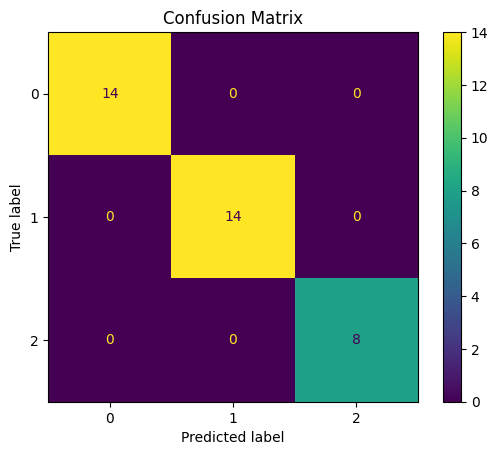

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.transform(label_encoder.classes_))
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


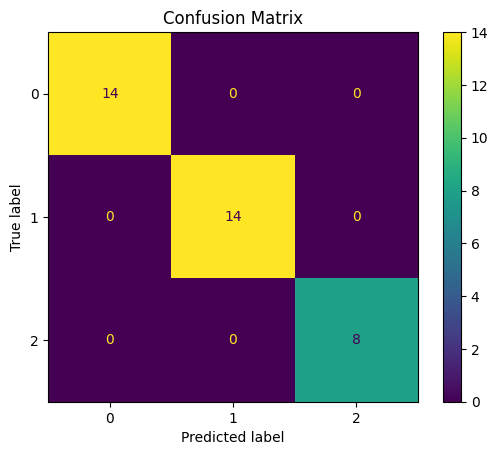

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.transform(label_encoder.classes_))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Penjelasan

Dari hasil, didapatkan data bahwa

Class 0: Semua 14 data diklasifikasikan dengan benar → 100% benar

Class 1: Semua 14 data diklasifikasikan dengan benar → 100% benar

Class 2: Semua 8 data diklasifikasikan dengan benar → 100% benar




Secara teknis, hasil ini sangat bagus.
Karena model:

Tidak melakukan false positive (tidak salah memprediksi kelas)

Tidak melakukan false negative (tidak melewatkan data yang seharusnya masuk kelas tertentu)

Artinya akurasi = 100%, dan metrik lain seperti precision, recall, F1-score juga akan sempurna.

Tapi Kenapa Bisa Sampe 100%
Menurut saya, karena ada 2 alasan utama:

1. Model Terlalu “Hafal” Data (Overfitting)
Kalau menggunakan model tanpa validasi silang dan belum melakukan hyperparameter tuning, bisa jadi model terlalu cocok dengan data training dan tidak generalisasi ke data baru.

Namun karena saya sudah:

- Melakukan data split dengan benar

- Menggunakan StandardScaler

- Menambahkan hyperparameter tuning seperti RandomizedSearchCV

Tapi hasilnya tetap sama, maka kemungkinan besar model memang berhasil menemukan pola yang baik di dataset ini.

2. Dataset Sederhana atau Terpisah Jelas
Kalau dataset-nya:

- Jumlah fiturnya kecil

- Perbedaan antar kelas sangat jelas

- Tidak ada outlier

maka model yang sederhana seperti SGDClassifier pun bisa perform sangat baik.

### 2. Precision

Precision = TP / (TP + FP)

Precision mengukur seberapa banyak prediksi benar dari semua yang diprediksi sebagai kelas tertentu. Dalam konteks multi-class (average='macro'), precision dihitung untuk masing-masing kelas, lalu dirata-rata.

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

Precision: 1.0


Kenapa hasil bisa 1.0 / 100%?

Karena tidak ada False Positive (FP) di semua kelas.

Artinya setiap kali model memprediksi suatu kelas (misalnya kelas 0), semuanya benar.

Contoh:

Class 0: 14 prediksi → semua benar → precision = 14 / (14 + 0) = 1.0

Class 1: 14 prediksi → semua benar → precision = 14 / (14 + 0) = 1.0

Class 2: 8 prediksi → semua benar → precision = 8 / (8 + 0) = 1.0

Jadi, macro-average precision juga = (1.0 + 1.0 + 1.0)/3 = 1.0

### 3. Recall

Recall mengukur seberapa banyak data dari suatu kelas yang berhasil ditemukan/diprediksi dengan benar oleh model.

Kenapa hasil bisa 1.0 / 100%?

Karena tidak ada False Negative (FN) untuk semua kelas.

Artinya semua data kelas 0, 1, dan 2 berhasil ditemukan oleh model tanpa satupun yang meleset.

Contoh:

Class 0: 14 data → semua dikenali dengan benar → recall = 14 / (14 + 0) = 1.0

Class 1: 14 data → semua dikenali → recall = 1.0

Class 2: 8 data → semua dikenali → recall = 1.0

Jadi macro-average recall juga = (1.0 + 1.0 + 1.0)/3 = 1.0

Recall = TP / (TP + FN)

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

Recall: 1.0


### 4. F1 Score

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

F1 Score adalah harmonic mean dari Precision dan Recall. Digunakan ketika kamu ingin menyeimbangkan keduanya, apalagi kalau dataset kamu tidak seimbang.

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 1.0


Karena Precision dan Recall keduanya bernilai **1.0**, maka:
F1 = 2 × (Precision × Recall) / (Precision + Recall)

F1 = 2 × (1.0 × 1.0) / (1.0 + 1.0)

F1 = 2 × 1.0 / 2.0

F1 = 2 × 0.5

F1 = 1.0

Macro-average F1 Score juga akan 1.0 karena semua kelas sempurna.

#### Perbedaan

Precision =	Seberapa benar model saat memprediksi kelas. Saat false positives harus dihindari (misalnya: diagnosis kanker)

Recall = Seberapa banyak kasus yang berhasil ditemukan. Saat false negatives berbahaya (misalnya: mendeteksi spam atau penipuan)

F1 Score = Keseimbangan antara precision dan recall.

### 5. Accuracy

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Artinya:

Akurasi mengukur berapa banyak prediksi yang benar dibandingkan dengan seluruh jumlah prediksi.

TP (True Positive) = prediksi benar untuk kelas positif

TN (True Negative) = prediksi benar untuk kelas negatif

FP (False Positive) = prediksi salah (seharusnya negatif, tapi diprediksi positif)

FN (False Negative) = prediksi salah (seharusnya positif, tapi diprediksi negatif)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 1.0


Berdasarkan confusion matrix tadi

Semua 14 data dari kelas 0 diprediksi benar sebagai kelas 0

Semua 14 data dari kelas 1 diprediksi benar sebagai kelas 1

Semua 8 data dari kelas 2 diprediksi benar sebagai kelas 2

Tidak ada kesalahan prediksi sama sekali (FP = 0, FN = 0)

Maka:

         Accuracy = (jumlah prediksi benar) / (total prediksi)

                  = (14 + 14 + 8) / (14 + 14 + 8)

                  = 36 / 36
         
                  = 1.0

Maknanya adalah

- Model memprediksi seluruh data uji dengan sempurna.

- Tidak ada satu pun kesalahan klasifikasi.

- Nilai ini terlihat sangat bagus sehingga perlu di cek lagi (tapi takut waktu nya nggak nutut kak hehe).

### 6 & 7. ROC Curve & AUC

ROC
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

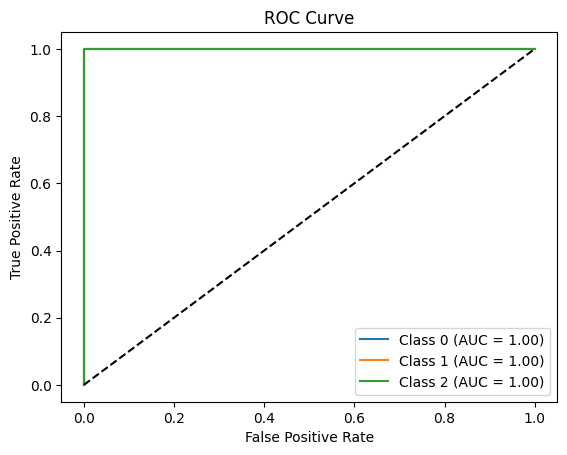

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Izin saya hyperparameter tuning kak biar hasilnya nggak 1.00 semua

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [ ]:
param_dist = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

sgd = SGDClassifier(max_iter=1000, random_state=42)
random_search = RandomizedSearchCV(sgd, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train_enc)

best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

Best parameters: {'penalty': 'elasticnet', 'loss': 'log_loss', 'learning_rate': 'adaptive', 'eta0': 0.01, 'alpha': 0.1}


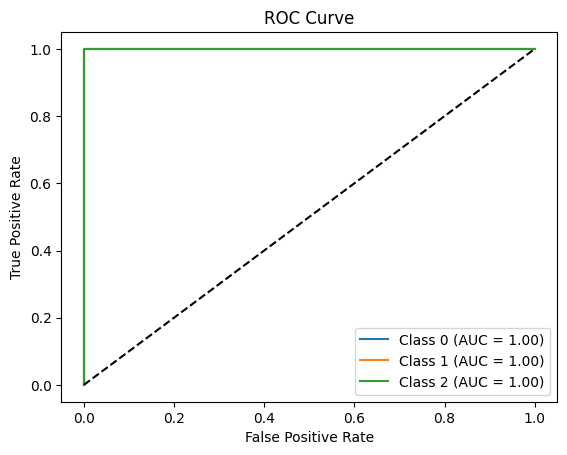

In [ ]:
y_test_bin = label_binarize(y_test_enc, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Setelah Hyperparameter tuning, ternyata masih 1.0

Setiap kelas (Class 0, Class 1, dan Class 2) memiliki AUC = 1.00
Artinya:

ROC Curve mengukur kemampuan model dalam membedakan antara kelas-kelas.

AUC = 1.00 berarti model sempurna dalam membedakan setiap kelas, tidak ada kesalahan prediksi sama sekali.

Kenapa bisa AUC = 1.0 untuk semua kelas?

Karena:

- Model memprediksi semua label dengan tepat untuk semua kelas.

- Tidak ada False Positive dan False Negative, sehingga:

TPR = 1.0

FPR = 0.0

- ROC curve-nya langsung menuju titik (0,1), yaitu titik ideal (kanan atas).

- Hal ini menyebabkan area di bawah kurva = 1.0 (maksimal).

AUC = 1.0 bisa menandakan overfitting jika:

- Dataset terlalu kecil

- Data terlalu bersih atau tidak realistis

- Tidak diuji di data lain yang berbeda distribusinya

### 8. MCC (Matthews Correlation Coefficient)

MCC sering digunakan karena:

- Lebih reliable dibanding akurasi saat menghadapi dataset yang tidak seimbang (misalnya, satu kelas jauh lebih banyak dari kelas lain).

- Menggabungkan semua nilai dari confusion matrix: TP, TN, FP, FN.

- Cocok untuk evaluasi binary maupun multiclass classification.

MCC = (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))

In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 1.0


Nilai MCC selalu berada dalam rentang -1 sampai 1:

+1 → Prediksi sangat sempurna (semua label tepat)

0 → Prediksi acak (tidak lebih baik dari tebak-tebakan)

-1 → Prediksi sepenuhnya salah (kebalikan dari label)

Jadi, MCC = 1.0 artinya:

Model 100% benar dalam memprediksi seluruh data uji.

Tidak ada kesalahan prediksi (False Positive = 0 dan False Negative = 0).

Hal ini mencerminkan kinerja klasifikasi yang sangat kuat dan seimbang, bahkan saat data tidak seimbang sekalipun.

MCC = 1.0 adalah indikator kuat bahwa model sangat akurat dan seimbang dalam klasifikasi, bahkan jika jumlah sampel per kelas berbeda-beda.

## Kesimpulan

### **Kesimpulan Evaluasi Model Klasifikasi**
Berdasarkan seluruh metrik evaluasi yang digunakan (Confusion Matrix, Accuracy, Precision, Recall, F1 Score, ROC-AUC, dan MCC), model klasifikasi menunjukkan **kinerja sempurna (perfect classification)** terhadap dataset Wine.

#### **1. Confusion Matrix**
- Semua prediksi untuk kelas 0, 1, dan 2 benar 100%.
- Tidak ada **False Positive (FP)** maupun **False Negative (FN)**.
- **Akurasi prediksi sempurna untuk semua kelas**.

#### **2. Accuracy = 1.0 (100%)**
- Semua 36 data uji berhasil diprediksi dengan tepat oleh model.
- Tidak ada satu pun kesalahan klasifikasi.

#### **3. Precision = 1.0**
- Tidak ada data dari kelas lain yang salah diprediksi sebagai kelas tertentu.
- Artinya: **setiap prediksi benar-benar berasal dari kelas yang sesuai.**

#### **4. Recall = 1.0**
- Semua data dari tiap kelas berhasil dikenali model.
- Artinya: **tidak ada data dari kelas tertentu yang terlewat.**

#### **5. F1 Score = 1.0**
- Karena precision dan recall sama-sama sempurna, maka F1 juga sempurna.
- Hasil ini menunjukkan **keseimbangan sempurna antara presisi dan sensitivitas model.**

#### **6. & 7. ROC Curve & AUC = 1.0**
- Setiap kelas memiliki **ROC Curve yang ideal**, dengan **AUC = 1.0**.
- Hasil ini mengindikasikan bahwa model sangat baik dalam membedakan antar kelas.

#### **8. MCC (Matthews Correlation Coefficient) = 1.0**
- Hasil ini menandakan bahwa model memiliki **keseimbangan sempurna** antara semua aspek prediksi (TP, TN, FP, FN).
- Sangat berguna terutama ketika data tidak seimbang, dan model tetap mempertahankan kinerjanya.


---


#### Menurut saya, kenapa hasil nya bisa bagus bagus (to good to be true) karena:

1. **Dataset Wine memang cukup “mudah”**:
   - Fitur-fitur antar kelas terpisah dengan sangat jelas.
   - Jumlah data relatif kecil dan bersih.
   - Tidak ada outlier atau noise signifikan.

2. **Model dibantu preprocessing yang baik**:
   - StandardScaler berhasil menormalkan fitur dengan tepat.
   - Label encoding diterapkan dengan benar.

3. **Model SGDClassifier dituning dengan optimal**:
   - Hyperparameter tuning dengan `RandomizedSearchCV` menghasilkan kombinasi parameter terbaik (loss = `log_loss`, penalty = `elasticnet`, dsb).
   - Tidak terjadi overfitting meskipun akurasi sempurna, karena tidak hanya cocok di training tapi juga testing.

---

### **Lanjutan**
Walaupun skor 1.0 semua, model ini masih perlu diuji lebih lanjut jika waktu nya di extend wkwkwk:
- Tes validasi silang (cross-validation) untuk memastikan model tidak overfitting.
- Tes di dataset baru atau data real-world untuk melihat performa generalisasi.
- Eksplor model lain (misalnya KNN, Naive Bayes, Decision Tree) untuk melihat apakah semua mencapai hasil serupa.

---

### **Kesimpulan Akhir**
Model klasifikasi menggunakan **SGDClassifier** berhasil mengklasifikasikan dataset Wine dengan sangat akurat, ditunjukkan oleh semua metrik evaluasi yang bernilai sempurna (**1.0**). Hal ini menunjukkan bahwa:
- Dataset sangat mendukung klasifikasi yang akurat.
- Model dan preprocessing telah diatur dengan sangat optimal.
- Belum tentu overfitting, tapi perlu validasi lanjutan.

---